## Data Industry Jobs 

## Questions

- States With Most Numbers of Jobs
- States with Average Annual Minimal and Maximal Salaries in the States
- Average Salary in Different States
- Top 5 Industries with Maximum Number of Data Science Related Job Postings
- Top 5 Industries with Average Annual Minimal and Maximal Salaries
- Companies with Maximum Number of Job Openings
- What should I learn in 2022 ?
- Most Demanded Skills for Data Sciences

In [73]:
using CSV, DataFrames, CategoricalArrays, Gadfly, StatsPlots, Plots

In [74]:
ENV["LINES"] = 1000

1000

In [75]:
data = CSV.read("data.csv", DataFrame);

In [76]:
names(data)

42-element Vector{String}:
 "index"
 "Job Title"
 "Salary Estimate"
 "Job Description"
 "Rating"
 "Company Name"
 "Location"
 "Headquarters"
 "Size"
 "Founded"
 "Type of ownership"
 "Industry"
 "Sector"
 "Revenue"
 "Competitors"
 "Hourly"
 "Employer provided"
 "Lower Salary"
 "Upper Salary"
 "Avg Salary(K)"
 "company_txt"
 "Job Location"
 "Age"
 "Python"
 "spark"
 "aws"
 "excel"
 "sql"
 "sas"
 "keras"
 "pytorch"
 "scikit"
 "tensor"
 "hadoop"
 "tableau"
 "bi"
 "flink"
 "mongo"
 "google_an"
 "job_title_sim"
 "seniority_by_title"
 "Degree"

In [41]:
describe(data)

,variable,mean,min
,Symbol,Union…,Any
1,index,469.129,0
2,Job Title,,Ag Data Scientist
3,Salary Estimate,,$10-$17 Per Hour(Glassdoor est.)
4,Job Description,,"(We are unable to sponsor for this role now or in the future)\n\nFare Buzz is one of the leading online travel providers specializing in worldwide travel and innovative technology; due to our buying power we leverage a unique ability to negotiate aggressive deals on air, hotels, car and vacation rentals to pass the savings on to business professionals who travel frequently and the everyday consumer.\n\nWe are seeking a Business Data Analyst to help lead analysis on pricing opportunities, customer behavior, and competitive positioning to build a long-term pricing strategy for the firm. This person will be part of the Pricing team, giving them unique access to make impactful decisions on Fareportal's revenue. The right candidate should be high-performing, driven, willing to learn and excited about travel.\n\nResponsibilities:\nWork collaboratively with departmental managers to identify areas of potential revenue growth (e.g. brand teams, marketing teams)\nPerform analysis of highest growth opportunity areas to identify and recommend new ways to improve revenue (e.g. analyses around pricing opportunities, competitive positioning, and customer behavior)\nUse statistical methods to analyze data and generate useful business reports outlining pricing recommendations\nBuild insight from the data collected to improve customer retention and marketing\nDesign a strategy to test pricing recommendations including a reasonable hypothesis, implementation, and key metrics for determining success\nTrack test performance against key performance indicators (KPIs) and launch successive tests\nClearly communicate results visually and verbally to stakeholders and senior management\nSupport executive leaders in mobilizing and execution of long-term plans (e.g., program management, setting/tracking metrics, developing roadmaps, creating process maps)\nRequirements:\nBachelor's Degree in Statistics, Mathematics, Economics or similar quantitative discipline\nMaster's Degree preferred\n2+ years of experience working in a data analyst role\nResults-oriented, self-driven individual with the ability to manage complex projects\nSQL experience and advanced Excel skills required; Python, R, PowerBI preferred\nMust have experience using google analytics\nExcellent verbal and written communication skills; ability to create an effective presentation to drive action\nAbility to collaborate effectively and work as part of a team\nDetail-oriented individual\nBasic understanding of Agile methodology"
5,Rating,3.61887,-1.0
6,Company Name,,"1-800-FLOWERS.COM, Inc.\n2.8"
7,Location,,"Agoura Hills, CA"
8,Headquarters,,-1
9,Size,,1 - 50


In [77]:
rename!(data, Dict(:"Avg Salary(K)" => :"avg_salary"));
rename!(data, Dict(:"Lower Salary" => :"lwr_salary"));
rename!(data, Dict(:"Upper Salary" => :"upr_salary"));
rename!(data, Dict(:"Job Location" => :"jb_lcsn"));

In [78]:
n, p = size(data)

(742, 42)

In [79]:
data[!, :job_title_sim]

742-element PooledArrays.PooledVector{String31, UInt32, Vector{UInt32}}:
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data engineer"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "data scientist"
 "data scientist"
 "data scientist"
 "data engineer"
 "analyst"
 "data engineer"
 "data scientist"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "analyst"
 "other scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data scientist"
 "data 

In [9]:
unique(data[!, :job_title_sim])

10-element Vector{String31}:
 "data scientist"
 "other scientist"
 "analyst"
 "data engineer"
 "data analitics"
 "na"
 "data modeler"
 "Data scientist project manager"
 "machine learning engineer"
 "director"

In [10]:
unique(data[!, :Location])

200-element Vector{String}:
 "Albuquerque, NM"
 "Linthicum, MD"
 "Clearwater, FL"
 "Richland, WA"
 "New York, NY"
 "Dallas, TX"
 "Baltimore, MD"
 "San Jose, CA"
 "Rochester, NY"
 "Chantilly, VA"
 "Plano, TX"
 "Seattle, WA"
 "Cambridge, MA"
 "Newark, NJ"
 "Mountain View, CA"
 "San Francisco, CA"
 "Denver, CO"
 "Chicago, IL"
 "Louisville, KY"
 "Herndon, VA"
 "Hillsboro, OR"
 "Worcester, MA"
 "Groton, CT"
 "Detroit, MI"
 "Sunnyvale, CA"
 "Ipswich, MA"
 "Redlands, CA"
 "Woburn, MA"
 "Fremont, CA"
 "Long Beach, NY"
 "Marlborough, MA"
 "Allendale, NJ"
 "Washington, DC"
 "Bellevue, WA"
 "Longmont, CO"
 "Beavercreek, OH"
 "Peoria, IL"
 "Fort Lauderdale, FL"
 "Boston, MA"
 "Huntsville, AL"
 "Armonk, NY"
 "San Diego, CA"
 "Saint Louis, MO"
 "Cincinnati, OH"
 "Palo Alto, CA"
 "Coraopolis, PA"
 "Framingham, MA"
 "Atlanta, GA"
 "Philadelphia, PA"
 "Vancouver, WA"
 "Indianapolis, IN"
 "Lake Forest, IL"
 "Maryland Heights, MO"
 "Charlottesville, VA"
 "Pittsburgh, PA"
 "Harrisburg, PA"
 "Laurel, MD"
 

In [11]:
unique(data[!, :seniority_by_title])

3-element Vector{String3}:
 "na"
 "sr"
 "jr"

In [12]:
unique(data[!, :lw_salary])

113-element Vector{Int64}:
  53
  63
  80
  56
  86
  71
  54
  38
 120
 126
  64
 106
  46
  83
 102
  67
 118
 110
  81
  73
 109
  75
  34
  72
  93
  85
  77
  82
 115
  74
  68
  52
 150
 158
  20
  41
 111
  84
 107
  49
  61
  88
  60
  96
  65
 139
  50
  99
  79
  57
  94
  37
 100
  55
  39
  31
 117
  40
  89
 200
 121
  76
  91
  95
  43
  29
  26
 112
  51
 113
  59
  44
 124
 131
 132
  35
  42
 116
  48
 105
  98
 114
 108
  90
 138
 190
  69
  66
  33
  62
  15
 127
  78
  45
  70
 130
  92
  36
  97
 202
  32
  87
 101
 125
  47
 176
 135
 129
 119
  27
  58
 136
 171

In [13]:
unique(data[!, :Competitors	])

128-element Vector{String}:
 "-1"
 "Oak Ridge National Laboratory, " ⋯ 30 bytes ⋯ " Los Alamos National Laboratory"
 "Commerce Signals, Cardlytics, Yodlee"
 "Digital Realty, CoreSite, Equinix"
 "Clicktripz, SmarterTravel"
 "Target, Costco Wholesale, Amazon"
 "Novartis, Baxter, Pfizer"
 "bluebird bio, Agios Pharmaceuticals, Celgene"
 "Angie's List, HomeAdvisor, Thumbtack"
 "Leidos, CACI International, Booz Allen Hamilton"
 "Thermo Fisher Scientific, Enzymatics, Illumina"
 "Pitney Bowes"
 "BrowserStack, Selenium Master, Perfecto Mobile"
 "Unilever, Procter & Gamble, Henkel"
 "UDR, AvalonBay Communities, Essex Property Trust"
 "American Express, Mastercard, Discover"
 "TASC, Vencore, Booz Allen Hamilton"
 "John Deere, Komatsu, CNH Industrial"
 "Travelers, Allstate, State Farm"
 "Munich Re, Hannover RE, SCOR"
 "Skyhigh Networks, Zscaler, NortonLifeLock"
 "Slalom, Daugherty Business Solutions"
 "REI, Academy Sports + Outdoors, Cabela's"
 "IDEO, Gongos, Inc., Ipsos"
 "ManTech, Booz Allen Ham

In [14]:
unique(data[!, :Revenue])

13-element Vector{String}:
 "\$50 to \$100 million (USD)"
 "\$2 to \$5 billion (USD)"
 "\$100 to \$500 million (USD)"
 "\$500 million to \$1 billion (USD)"
 "Unknown / Non-Applicable"
 "\$1 to \$2 billion (USD)"
 "\$25 to \$50 million (USD)"
 "\$10+ billion (USD)"
 "\$1 to \$5 million (USD)"
 "\$10 to \$25 million (USD)"
 "\$5 to \$10 billion (USD)"
 "Less than \$1 million (USD)"
 "\$5 to \$10 million (USD)"

In [15]:
unique(data[!, :Sector])

25-element Vector{String}:
 "Aerospace & Defense"
 "Health Care"
 "Business Services"
 "Oil, Gas, Energy & Utilities"
 "Real Estate"
 "Finance"
 "Information Technology"
 "Retail"
 "Biotech & Pharmaceuticals"
 "Media"
 "Insurance"
 "Transportation & Logistics"
 "Telecommunications"
 "-1"
 "Manufacturing"
 "Mining & Metals"
 "Government"
 "Education"
 "Agriculture & Forestry"
 "Travel & Tourism"
 "Non-Profit"
 "Arts, Entertainment & Recreation"
 "Construction, Repair & Maintenance"
 "Accounting & Legal"
 "Consumer Services"

In [80]:
unique(data[!, :Degree])

3-element Vector{String3}:
 "M"
 "na"
 "P"

In [17]:
levels(data[!, :job_title_sim])

10-element Vector{String31}:
 "Data scientist project manager"
 "analyst"
 "data analitics"
 "data engineer"
 "data modeler"
 "data scientist"
 "director"
 "machine learning engineer"
 "na"
 "other scientist"

In [18]:
levels(data[!, :job_title_sim])

10-element Vector{String31}:
 "Data scientist project manager"
 "analyst"
 "data analitics"
 "data engineer"
 "data modeler"
 "data scientist"
 "director"
 "machine learning engineer"
 "na"
 "other scientist"

In [19]:
levels(data[!, :Rating])

31-element Vector{Float64}:
 -1.0
  1.9
  2.1
  2.2
  2.3
  2.4
  2.5
  2.6
  2.7
  2.8
  2.9
  3.0
  3.1
  3.2
  3.3
  3.4
  3.5
  3.6
  3.7
  3.8
  3.9
  4.0
  4.1
  4.2
  4.3
  4.4
  4.5
  4.6
  4.7
  4.8
  5.0

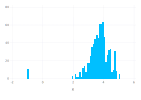

In [15]:
Gadfly.plot(x=data[!, :Rating], Geom.histogram)

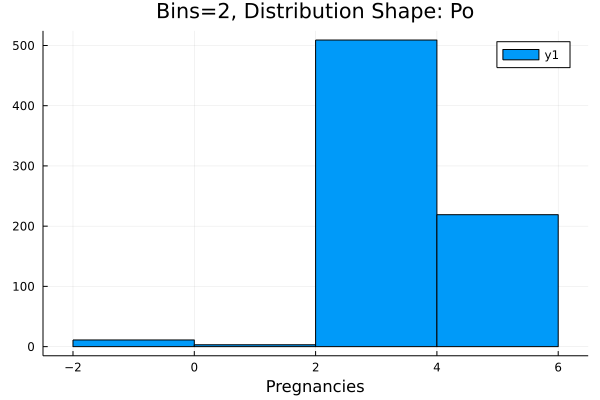

In [16]:
h1 = Plots.histogram(data[!, :Rating], bins = 5, xlabel = "Pregnancies", title = "Bins=2, Distribution Shape: Po")

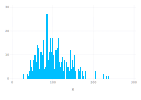

In [17]:
Gadfly.plot(x=data[!, :avg_salary], Geom.histogram)

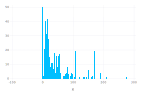

In [18]:
Gadfly.plot(x=data[!, :Age], Geom.histogram)

In [115]:
using DataStructures,  StatsBase
d = sort(countmap(data[!, :job_title_sim]), byvalue=true, rev=true)

OrderedDict{String31, Int64} with 10 entries:
  "data scientist"                 => 313
  "other scientist"                => 143
  "data engineer"                  => 119
  "analyst"                        => 101
  "machine learning engineer"      => 22
  "Data scientist project manager" => 16
  "na"                             => 10
  "data analitics"                 => 8
  "data modeler"                   => 5
  "director"                       => 5

## Job Titles with Most Number of Jobs

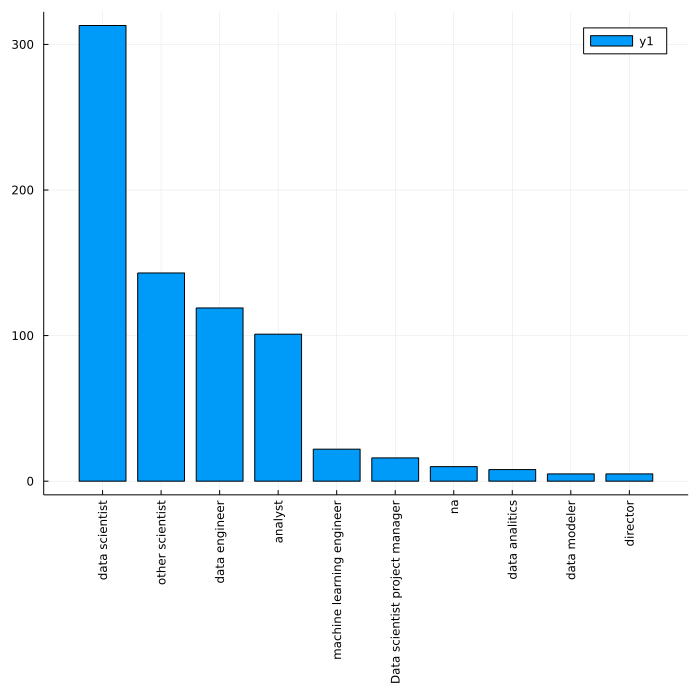

In [124]:
b = bar(d, xrotation=90, size = (700, 700))

In [117]:
savefig(p,"file.png")

In [118]:
d1 = sort(countmap(data[!, :Sector]), byvalue=true, rev=true)
p1 = Dict(first(d1, 10))

Dict{String, Int64} with 10 entries:
  "Health Care"               => 49
  "Finance"                   => 42
  "Aerospace & Defense"       => 25
  "Manufacturing"             => 34
  "Education"                 => 23
  "Insurance"                 => 69
  "Retail"                    => 15
  "Information Technology"    => 180
  "Biotech & Pharmaceuticals" => 112
  "Business Services"         => 97

## Top 10 Sectors for Data Science

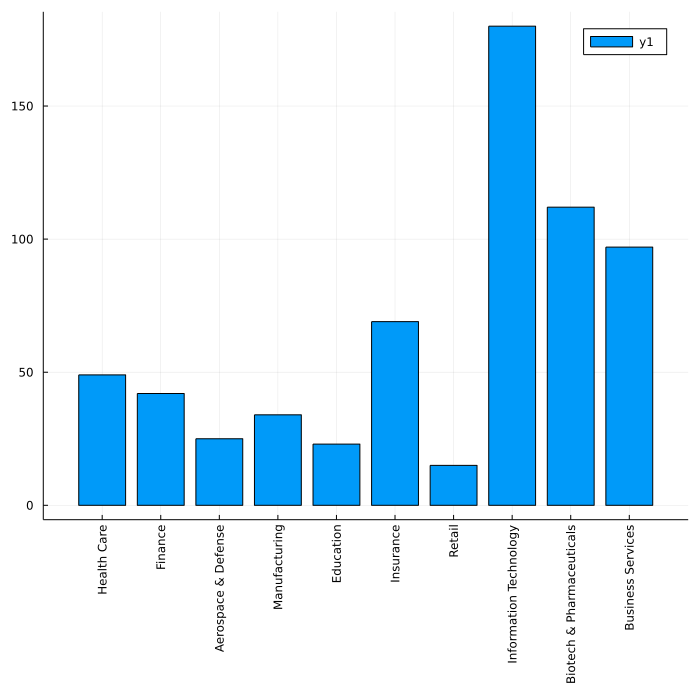

In [125]:
b1 = bar(p1, xrotation=90, size = (700, 700))

In [127]:
d2 = sort(countmap(data[!, :jb_lcsn]), byvalue=true, rev=true)
p2 = Dict(first(d2, 10))

Dict{String3, Int64} with 10 entries:
  "WA" => 21
  "CA" => 152
  "NC" => 21
  "MA" => 103
  "NY" => 72
  "VA" => 41
  "PA" => 33
  "TX" => 28
  "IL" => 40
  "MD" => 35

## States With Most Numbers of Jobs

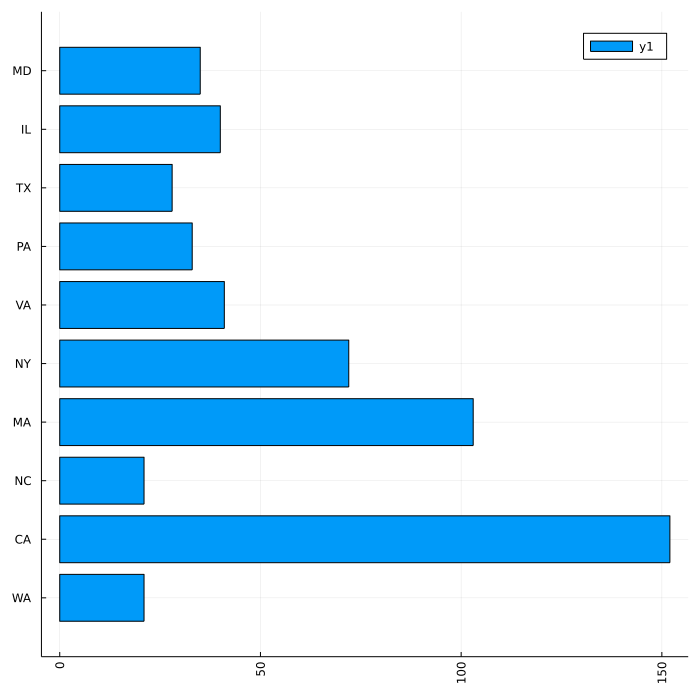

In [129]:
b2 = bar(p2, xrotation=90, size = (700, 700), orientation=:h)

In [22]:
countmap(data[!, :jb_lcsn])

Dict{String3, Int64} with 37 entries:
  "AZ" => 9
  "DC" => 11
  "IA" => 5
  "NM" => 3
  "RI" => 1
  "NJ" => 17
  "DE" => 6
  "NE" => 4
  "MD" => 35
  "KS" => 3
  "MI" => 6
  "AL" => 8
  "MO" => 9
  "FL" => 16
  "ID" => 2
  "CO" => 11
  "UT" => 10
  "CA" => 152
  "WI" => 10
  "NY" => 72
  "MN" => 2
  "KY" => 6
  "SC" => 1
  "OH" => 14
  "GA" => 6
  "WA" => 21
  "TN" => 13
  "CT" => 5
  "NC" => 21
  "TX" => 28
  "VA" => 41
  "MA" => 103
  "OR" => 4
  "PA" => 33
  "IN" => 10
  "IL" => 40
  "LA" => 4

In [50]:
levels(data[!, :jb_lcsn])

37-element Vector{String3}:
 "AL"
 "AZ"
 "CA"
 "CO"
 "CT"
 "DC"
 "DE"
 "FL"
 "GA"
 "IA"
 "ID"
 "IL"
 "IN"
 "KS"
 "KY"
 "LA"
 "MA"
 "MD"
 "MI"
 "MN"
 "MO"
 "NC"
 "NE"
 "NJ"
 "NM"
 "NY"
 "OH"
 "OR"
 "PA"
 "RI"
 "SC"
 "TN"
 "TX"
 "UT"
 "VA"
 "WA"
 "WI"

In [60]:
s = ["AL", "AZ", "CA", "CO", "CT", "DC", "DE", "FL", "GA", "IA", "ID", "IL", "IN", "KS", "KY", "LA", "MA", "MD", "MI", "MN", "MO", "NC", "NE", "NJ", "NM", "NY", "OH", "OR", "PA", "RI", "SC", "TN", "TX", "UT", "VA", "WA", "WI"];
sz = size(s)

(37,)

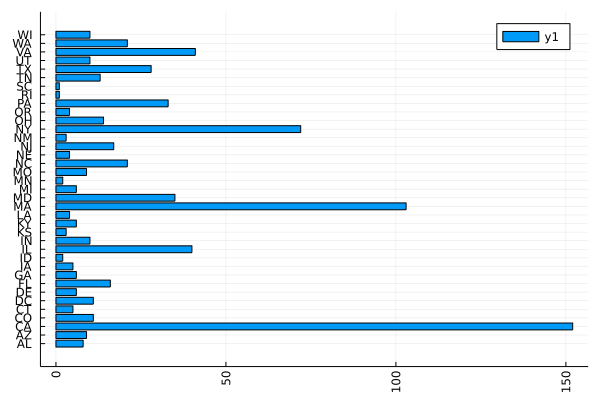

In [63]:
datamap = countmap(data[!, :jb_lcsn])
q = bar((x -> datamap[x]).(s), yticks=(1:37, s), xrotation=90, orientation=:h)

In [84]:
using PlotlyJS

WebIO._IJuliaInit()

In [88]:
PlotlyJS.plot(data, x=:jb_lcsn, y=:avg_salary, kind="bar")

data: [
  "bar with fields type, x, xaxis, y, and yaxis"
]

layout: "layout with fields legend, margin, template, xaxis, and yaxis"

In [83]:
datamap1 = countmap(data[!, :job_title_sim])

@df data groupedhist(:avg_salary, group = :Degree, bar_position = :dodge)

LoadError: UndefVarError: extractGroupArgs not defined

In [ ]:
q = bar(countmap(data[!, :jb_lcsn]), xrotation=90, orientation=:h)

In [47]:
groupedbar(data[!, :lwr_salary], data[!, :upr_salary], bar_position = :dodge, bar_width=0.7)

LoadError: BoundsError: attempt to access Tuple{Int64} at index [2]

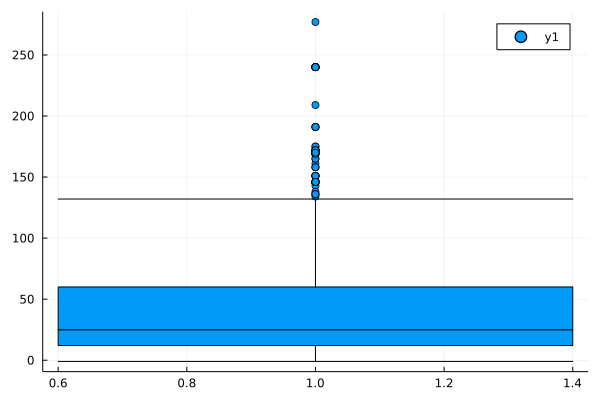

In [46]:
 StatsPlots.boxplot(data[!, :Age])

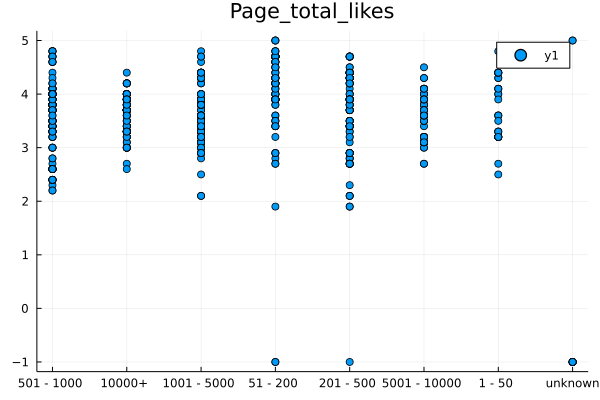

In [28]:

p1 = scatter(data[!,:Size], data[!,:Rating], title = "Page_total_likes")


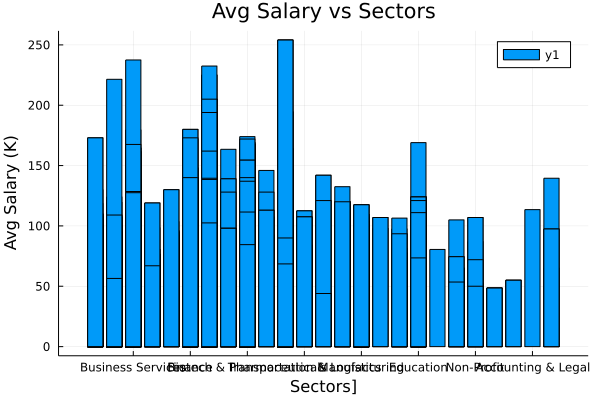

In [29]:
p = bar(data[!, :Sector], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")


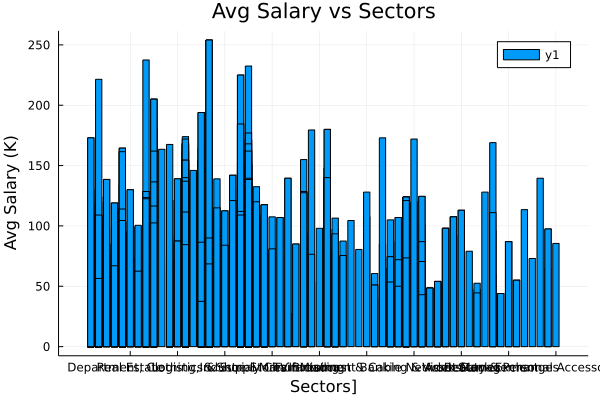

In [30]:
p = bar(data[!, :Industry], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")

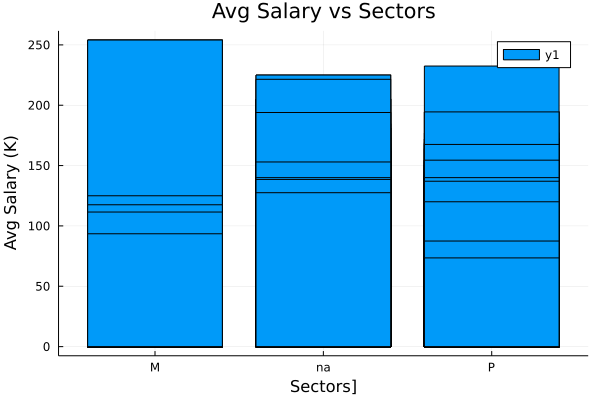

In [31]:
p = bar(data[!, :Degree], data[!,:avg_salary])
xflip = true,
xlabel!("Sectors]")
ylabel!("Avg Salary (K)")
title!("Avg Salary vs Sectors")

In [32]:
unique(data[!, :Hourly])

2-element Vector{Int64}:
 0
 1

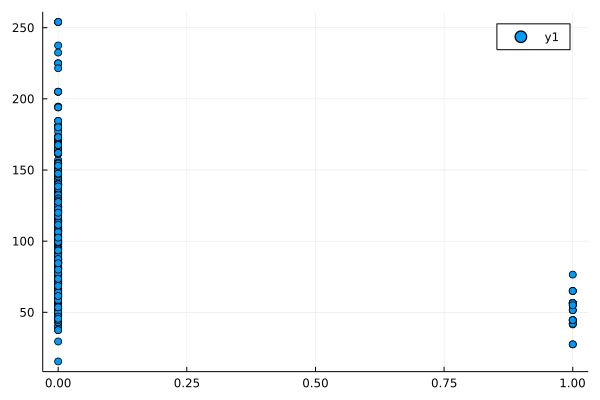

In [33]:
using Plots
Plots.plot(data[!,:Hourly], data[!,:avg_salary], seriestype = :scatter)

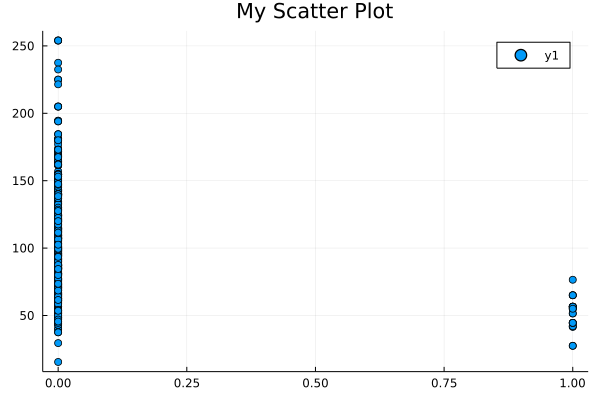

In [34]:
scatter(data[!,:Hourly], data[!,:avg_salary], title = "My Scatter Plot")

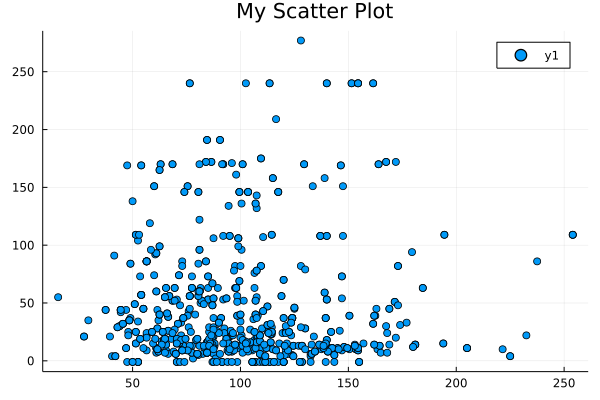

In [35]:
scatter(data[!,:avg_salary], data[!,:Age], title = "My Scatter Plot")